pour travailler à deux

In [18]:
import pandas as pd 

df = pd.read_csv('data_set/SBAnational-EDA.csv')
X = df.drop(columns=['Unnamed: 0', 'MIS_Status'], axis=1).reset_index(drop=True)
y = df[['MIS_Status']].reset_index(drop=True)
display(X.head(1))
display(y.head(1))

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,4,...,0,N,Y,2010-03-13,1999-02-28,60000.0,0.0,0.0,60000.0,48000.0


,MIS_Status
0,P I F


___
# matrice de correlation

In [ ]:
numerical_features = make_column_selector(dtype_include=np.number) # plutôt que : numerical_features = ['age', 'bmi', 'children']
categorical_features = make_column_selector(dtype_exclude=np.number) # plutôt que : categorical_features = ['region']

numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='if_binary'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       (categorical_pipeline, categorical_features))

preprocessor = make_pipeline(preprocessor, PolynomialFeatures())

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,8544,15,47711,1021,16,451120,5037,30,84,4,...,0,1,1,5314,5570,60000.0,0.0,0.0,60000.0,48000.0


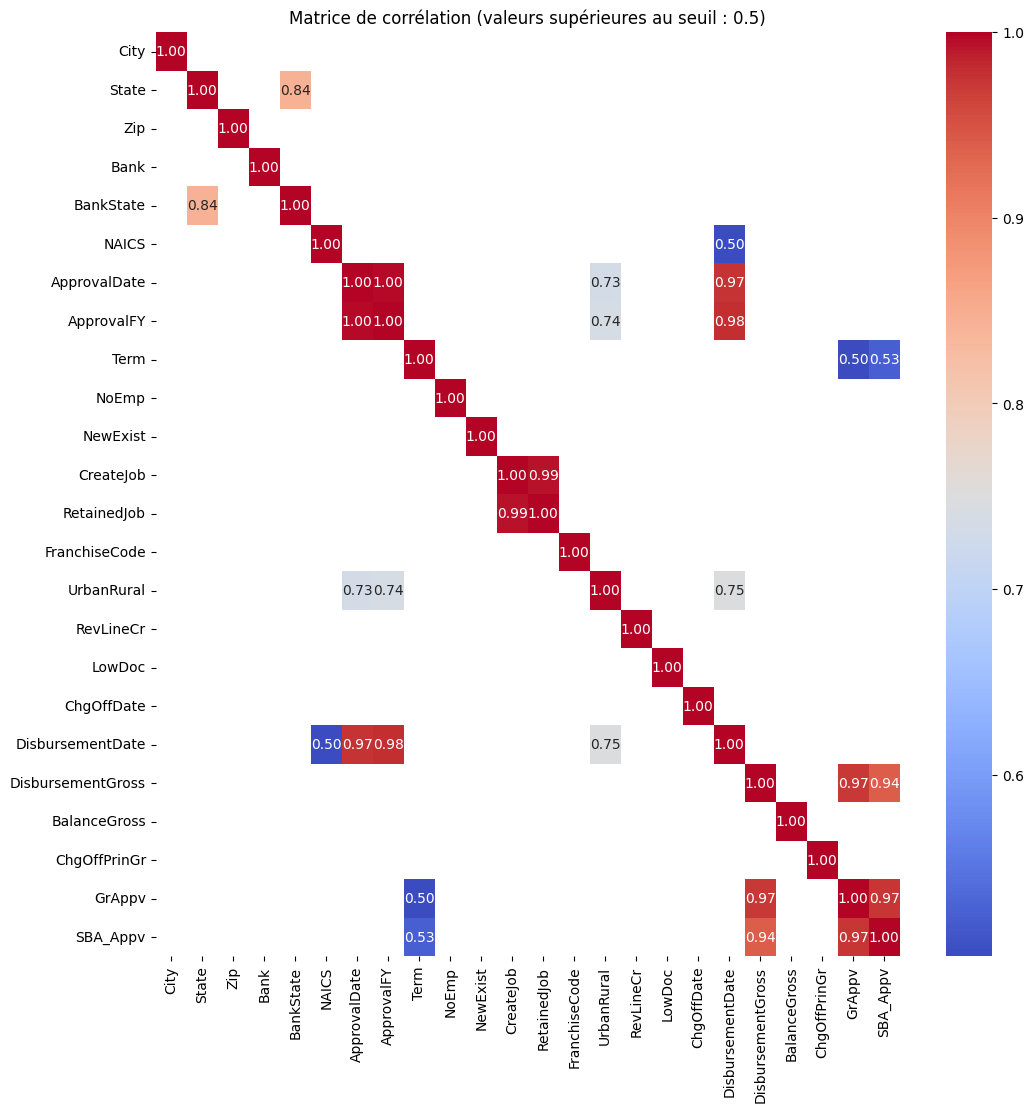

Paires de features avec des corrélations supérieures au seuil : 0.5
('BankState', 'State', 0.8432340751354883)
('ApprovalDate', 'ApprovalFY', 0.9978630357400775)
('ApprovalDate', 'UrbanRural', 0.7323454534850674)
('ApprovalDate', 'DisbursementDate', 0.9747558339179458)
('ApprovalFY', 'UrbanRural', 0.7385294361845057)
('ApprovalFY', 'DisbursementDate', 0.9786831715257427)
('CreateJob', 'RetainedJob', 0.9939456961831947)
('DisbursementDate', 'NAICS', 0.5021795891472903)
('DisbursementDate', 'UrbanRural', 0.7474791247989988)
('DisbursementGross', 'GrAppv', 0.9713474377544361)
('DisbursementGross', 'SBA_Appv', 0.9401621842088503)
('GrAppv', 'Term', 0.5026810836996909)
('GrAppv', 'SBA_Appv', 0.9743087557313729)
('SBA_Appv', 'Term', 0.525066169501902)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector

colonnes_non_numeriques = make_column_selector(dtype_exclude=np.number)(X)
label_encoder = LabelEncoder()
for colonne in colonnes_non_numeriques:
    X[colonne] = label_encoder.fit_transform(X[colonne])

display(X.head(1))

correlation_matrix = X.corr()

# Définir le seuil de corrélation
seuil = 0.5

# Créer une liste pour stocker les paires de features et leurs valeurs de corrélation
paires_features_correlation = []

# Parcourir chaque colonne de la matrice de corrélation
for col in correlation_matrix.columns:
    # Extraire les paires de features et leurs valeurs de corrélation
    correlated_cols = correlation_matrix.index[abs(correlation_matrix[col]) > seuil]
    for correlated_col in correlated_cols:
        if correlated_col != col and correlated_col > col:  # Pour éviter d'ajouter la corrélation de la feature elle-même et les doublons
            paires_features_correlation.append((col, correlated_col, correlation_matrix.loc[col, correlated_col]))

# Filtrer les valeurs de la matrice de corrélation pour ne garder que celles supérieures au seuil
correlation_matrix_filtree = correlation_matrix[abs(correlation_matrix) > seuil]

# Créer une heatmap avec seaborn pour afficher les valeurs supérieures au seuil
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix_filtree, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Matrice de corrélation (valeurs supérieures au seuil : {seuil})')
plt.show()

# Afficher les paires de features et leurs valeurs de corrélation
print(f"Paires de features avec des corrélations supérieures au seuil : {seuil}")
for pair in paires_features_correlation:
    print(pair)